In this lab, you are supposed to do the following tasks related to autoregressive models.

1. Simulation of an AR model.
2. Estimate the AR model coefficients from data.

Recall that our AR model is defined as follows:
$$
X_k = a_1 \, X_{k - 1} + a_2 \, X_{k - 2} + \cdots + a_p \, X_{k - p} + \epsilon_k, \quad \epsilon_k \sim \mathrm{N}(0, \sigma^2)
$$

To pass this assignment, you need to pass all the tasks and answer the questions (except for those marked optional). You are also asked to report the contributions if you worked in a team.

## Note
To get a result consistent with the teacher's:

1. Use "Run All".
2. Do not change the random seed.
3. Do not change the plotting settings.

# Setup
Let's first import the necessary libraries and set a random seed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(777)


plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.size': 20})

# Task 1: Define an AR model and simulate a path thereof
Your first task is to simulate a path $X_{1:N} \coloneqq \lbrace X_0, X_1, \ldots, X_N \rbrace$ of an AR model of order $p=4$.
You need to implement a function that takes inputs: 1) the AR coefficients, 2) the initial values, 3) the length of the path, and 4) the noise standard deviation, and returns a path of the AR model.

In [2]:
p = 4  # The AR order


def simulate_path(coeffs_: np.ndarray,
                  init_vals_: np.ndarray,
                  N_: int,
                  sigma_: float) -> np.array:
    """

    Parameters
    ----------
    coeffs_ : (4, )
        The coefficients of the AR model, a1, a2, a3, a4. (note the ordering)
    init_vals_ : (4, )
        The initial values of the AR model, x0, x1, x2, x3. (note the temporal ordering)
    N_ : int
        The length of the path to simulate.
    sigma_ : float
        The noise standard deviation.

    Returns
    -------
    np.ndarray (N + 1, )
        The simulated path X_0, X_1, ..., X_N of the AR model.
    """
    xs = np.zeros(N_ + 1)  # Initialise the AR path with an empty container
    xs[:p] = init_vals_  # Set the initial values x0, x1, x2, x3
    for k in range(p, N_ + 1):
        xs[k] = coeffs_ @ xs[k-p:k][::-1] + np.random.normal(0,sigma_)
        # basic syntax of Python slicing: [start:stop:step] [::-1]
    return xs

In [3]:
coeffs = np.array([0.9, -0.4, 0.2, 0.2]) 
a = np.array([0.9, -0.4, 0.2, 0.2])  # These are a1, a2, ..., a4
a @ coeffs

np.float64(1.05)

Now we consider $N = 1000$ time points.
The coefficients $a_1, a_2, \ldots, a_p$, the initial values $X_{0:3}$, and the noise scales are given as follows.
Simulate a path of the AR model using the function you just implemented, and plot the path.

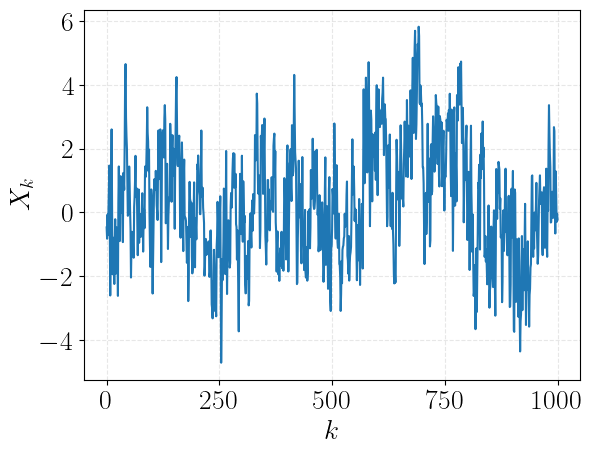

In [4]:
N = 1000  # The length of the path
ks = np.arange(N + 1)  # The time steps, from 0 to N
sigma = 1.  # The noise std
coeffs = np.array([0.9, -0.4, 0.2, 0.2])  # These are a1, a2, ..., a4
init_vals = np.random.randn(4)  # Random initial values

path = simulate_path(coeffs, init_vals, N, sigma)
_ = plt.plot(ks, path)
plt.xlabel('$k$')
plt.ylabel('$X_k$')
plt.grid(linestyle='--', alpha=0.3, which='both')

# Task 2: Estimate the coefficients of the AR model

Your second task is to estimate the coefficients via least square *given a path of the AR model*. We will use the path you just simulated as the data and compare the estimated coefficients to the true ones.

To perform the estimation, you first need to rewrite the AR model in the form of a linear system $y = A \, x + \epsilon$ for which $x$ stands for the unknown, $y$ is the data, and $\epsilon$ is the noise:

$$
\begin{bmatrix}
X_p \\ X_{p + 1} \\ \vdots \\ X_{N}
\end{bmatrix}
=
\begin{bmatrix}
X_{p - 1} & X_{p - 2} & \cdots & X_{0} \\
X_{p} & X_{p - 1} & \cdots & X_{1} \\
\vdots & \vdots & \ddots & \vdots \\
X_{N - 1} & X_{N - 2} & \cdots & X_{N - p}
\end{bmatrix}
\begin{bmatrix}
a_1 \\ a_2 \\ \vdots \\ a_p
\end{bmatrix}
+ \epsilon_{p:N}
$$

Solving this linear system can be achieved by using the `np.linalg.lstsq` function.

In [5]:
# We now need to form a linear system to solve for the coefficients.
y = path[p:]
A = np.matrix(np.zeros((N-p+1,p)))
for row in range(N-p+1):
    A[row, ] = path[row:(row+p)][::-1]
    
estimated_coeffs, *_ = np.linalg.lstsq(A,y) 
# Solves the linear system Ax = y for x
print(f'Estimated coefficients {estimated_coeffs} vs the true ones {coeffs}')

Estimated coefficients [ 0.90547989 -0.39306913  0.22129365  0.13944619] vs the true ones [ 0.9 -0.4  0.2  0.2]


# Task 3 (optional): Make predictions from the AR model
The third task is to make predictions from the AR model using the estimated coefficients.
Suppose that the path until time $k=700$ is given as the data, and we want to predict the path from $k=701$ to $k=N$.
We then compare the predicted path with the true path.

This is almost the same as Task 1.

That is, we assume that $X_{0:700}$ is given, and we want to predict $X_{701:N}$.

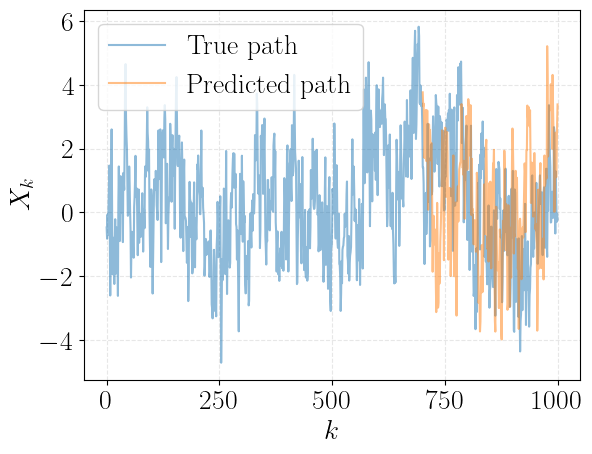

In [6]:
# The code gave you here is one way to do it; you are not limited to this.
k = 700

init_vals = path[k-p+1:k+1]
predicted_path = simulate_path(estimated_coeffs, init_vals, N-k-1, sigma)

plt.plot(ks, path, alpha=0.5, label='True path')
plt.plot(ks[k + 1:], predicted_path, alpha=0.5, label='Predicted path')
_ = plt.legend()
plt.xlabel('$k$')
plt.ylabel('$X_k$')
plt.grid(linestyle='--', alpha=0.3, which='both')

# Question 1

When we make predictions based the estimated coefficients from the data and compare to the true path (Task 3), we actually "cheated". Can you identify what we did wrong?

The coefficients been used for prediction is actually estimated from the whole time series, including the later 300 time steps that need to be predicted. This means the information of those time steps has been leaked and included in the coefficient. 

# Task 4 (optional): Play with different coefficients

Try to play with different coefficients settings and see how the AR model behaves. e.g., `coeffs = np.array([0.9, -0.9, -0.1, 0.1])`, and briefly explain what you observe. Doing this can compensate for a point you lost in one of the tasks above.

In [7]:

np.random.seed(777)
init_vals = np.random.randn(4)  # Random initial values
print(coeffs)

[ 0.9 -0.4  0.2  0.2]


In [8]:
coeffs_1 = np.array([0.1, -0.4, 0.2, 0.2])
coeffs_2 = np.array([0.9, 0.4, 0.2, 0.2])
coeffs_3 = np.array([0.9, -0.4, 0.1, 0.2])
coeffs_4 = np.array([0.9, -0.4, 0.2, -0.2])

predicted_path_1 = simulate_path(coeffs_1, init_vals, N, sigma)
predicted_path_2 = simulate_path(coeffs_2, init_vals, N, sigma)
predicted_path_3 = simulate_path(coeffs_3, init_vals, N, sigma)
predicted_path_4 = simulate_path(coeffs_4, init_vals, N, sigma)

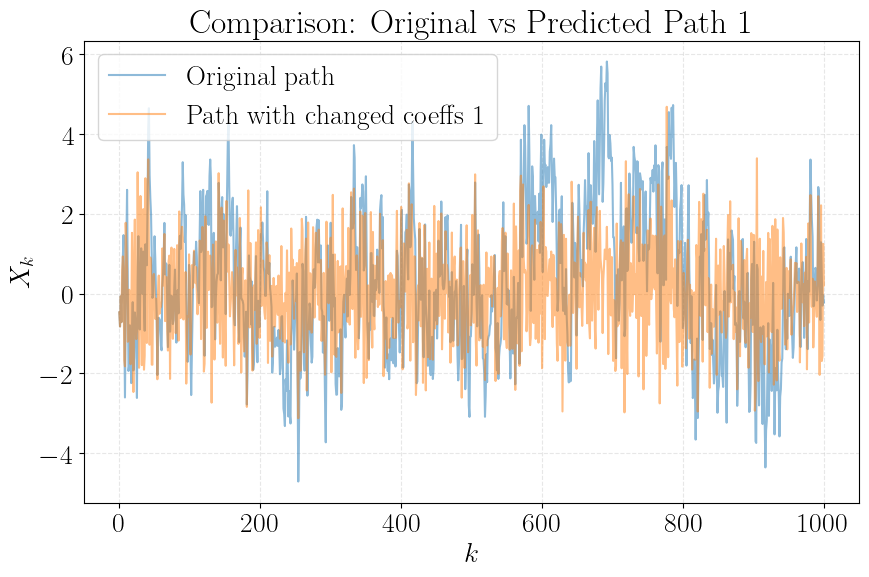

In [9]:
# Separate plot for predicted_path_1
plt.figure(figsize=(10, 6))
plt.plot(ks, path, alpha=0.5, label='Original path')
plt.plot(ks, predicted_path_1, alpha=0.5, label='Path with changed coeffs 1')

plt.legend()
plt.xlabel('$k$')
plt.ylabel('$X_k$')
plt.title('Comparison: Original vs Predicted Path 1')
plt.grid(linestyle='--', alpha=0.3, which='both')
plt.show()

By changing the coefficient for a1 (from 0.9 to 0.1), the volatiity has been reduced and the process has less extreme values.

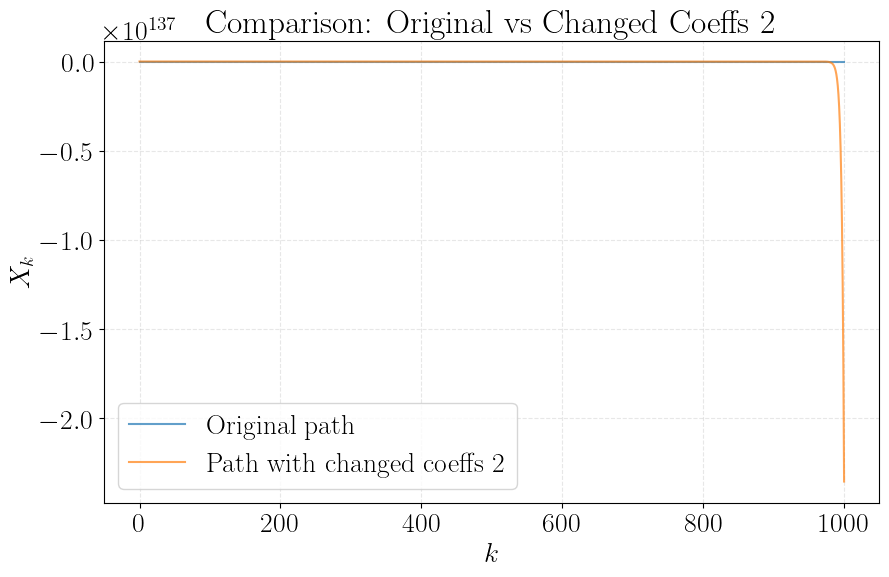

In [10]:
# Separate plot for original vs coeffs_2
plt.figure(figsize=(10, 6))
plt.plot(ks, path, alpha=0.7, label='Original path')
plt.plot(ks, predicted_path_2, alpha=0.7, label='Path with changed coeffs 2')

plt.legend()
plt.xlabel('$k$')
plt.ylabel('$X_k$')
plt.title('Comparison: Original vs Changed Coeffs 2')
plt.grid(linestyle='--', alpha=0.3, which='both')
plt.show()

By flipping the sign of the coefficient for a2 (from -0.4 to 0.4), the path begins to grow epotentially at around k=900.

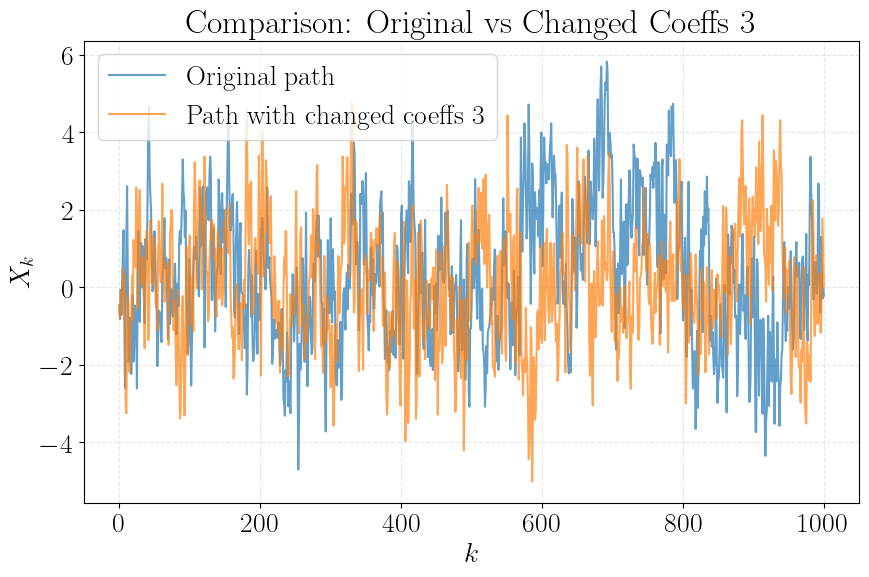

In [11]:
# Separate plot for original vs coeffs_3
plt.figure(figsize=(10, 6))
plt.plot(ks, path, alpha=0.7, label='Original path')
plt.plot(ks, predicted_path_3, alpha=0.7, label='Path with changed coeffs 3')

plt.legend()
plt.xlabel('$k$')
plt.ylabel('$X_k$')
plt.title('Comparison: Original vs Changed Coeffs 3')
plt.grid(linestyle='--', alpha=0.3, which='both')
plt.show()

By changing the coefficient for a3 (from 0.2 to 0.1), path has similar hebavior as the original one.

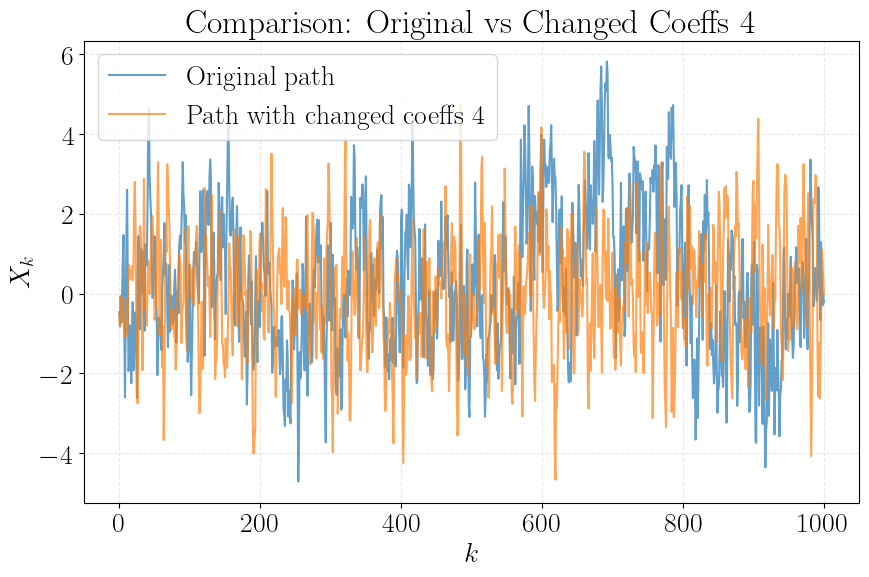

In [12]:
# Separate plot for original vs coeffs_4
plt.figure(figsize=(10, 6))
plt.plot(ks, path, alpha=0.7, label='Original path')
plt.plot(ks, predicted_path_4, alpha=0.7, label='Path with changed coeffs 4')

plt.legend()
plt.xlabel('$k$')
plt.ylabel('$X_k$')
plt.title('Comparison: Original vs Changed Coeffs 4')
plt.grid(linestyle='--', alpha=0.3, which='both')
plt.show()

By flipping the sign of the coefficient for a4 (from 0.2 to -0.2), path has similar hebavior as the original one.

# Contribution statement

If you have teamed up with someone, please write down the contribution of each team member in this cell. If you worked alone, you can leave this cell empty.


This assignment was completed as a team effort with equal contributions from Xiaochen and Nisal. Xiaochen is responsible for task 1 and 3, Nisal is responsible for task 2 and 4.
